# 12. Arquitecturas avanzadas de redes neuronales
[**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/)

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

## API funcional de Keras


Modelo base:



In [2]:

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model_base = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_base.summary()



11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Modelo con la *functional API* de Keras:


In [0]:
from tensorflow import keras

inputs  = keras.Input(shape=(784,))

In [4]:
inputs.shape

TensorShape([None, 784])

In [5]:
inputs.dtype

tf.float32

In [0]:
from tensorflow.keras import layers

dense1  = layers.Dense(64, activation='relu')(inputs)

In [0]:
dense2  = layers.Dense(64, activation='relu')(dense1)
outputs = layers.Dense(10, activation='softmax')(dense2)

In [0]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Resumen del modelo:

In [0]:
inputs  = keras.Input(shape=(784,))
dense1  = layers.Dense(64, activation='relu')(inputs)
dense2  = layers.Dense(64, activation='relu')(dense1)
outputs = layers.Dense(10, activation='softmax')(dense2)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [11]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


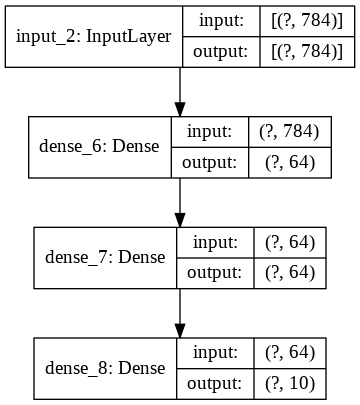

In [12]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [13]:
model.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2817 - accuracy: 0.9186
Epoch 2/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1252 - accuracy: 0.9615
Epoch 3/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0893 - accuracy: 0.9725
Epoch 4/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0708 - accuracy: 0.9780
Epoch 5/5
10000/10000 [==============================] - 0s 45us/sample - loss: 0.0921 - accuracy: 0.9743


[0.09208963821472134, 0.9743]

Diferentes opciones de uso de la API


In [14]:
def get_model():
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1, activation='sigmoid')(inputs)
  return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

ensemble_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 1)            129         input_6[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 1)            129         input_6[0][0]                    
__________________________________________________________________________________________________
model_3 (Model)                 (None, 1)            129         input_6[0][0]                    
____________________________________________________________________________________________

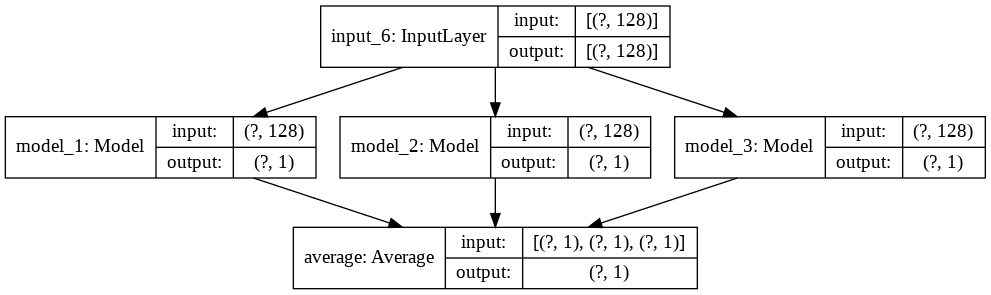

In [15]:
keras.utils.plot_model(ensemble_model, show_shapes=True)

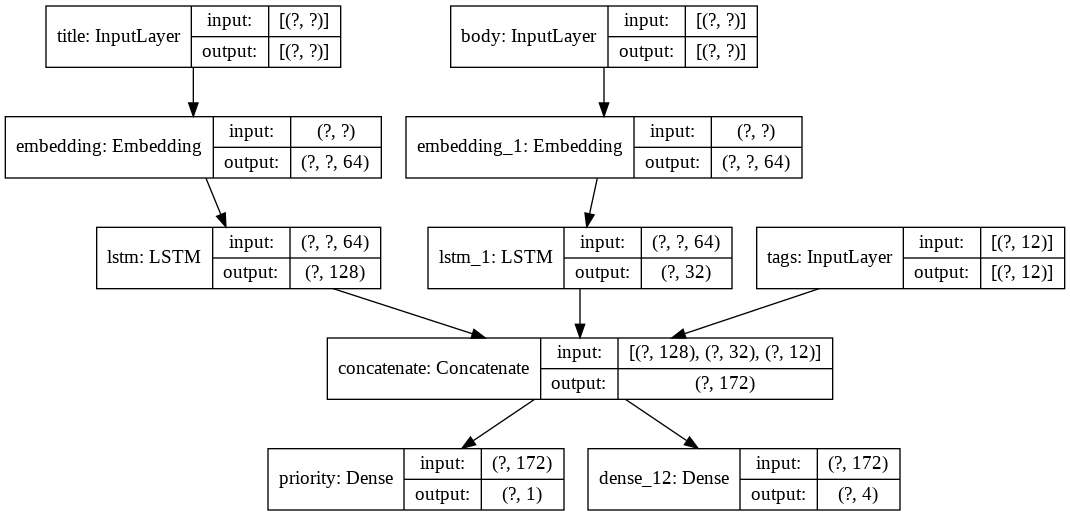

In [16]:
num_tags = 12  
num_words = 10000  
num_departments = 4  

title_input = keras.Input(shape=(None,), name='title') 
body_input = keras.Input(shape=(None,), name='body')  
tags_input = keras.Input(shape=(num_tags,), name='tags')  

title_features = layers.Embedding(num_words, 64)(title_input)
body_features = layers.Embedding(num_words, 64)(body_input)

title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)

x = layers.concatenate([title_features, body_features, tags_input])

priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(x)
department_pred = layers.Dense(num_departments, activation='softmax')(x)

model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

keras.utils.plot_model(model, show_shapes=True)


## Redes neuronales con nombre propio

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D


input_shape = (224, 224, 3)

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape, 
                 padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='softmax'))


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)      

In [24]:
from tensorflow.keras.applications import VGG16

model = VGG16(weights='imagenet')


553467904/553467096 [==============================] - 13s 0us/step


In [25]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## EJEMPLOS DELS D'ASSIGNATURA 

# CIFAR workload

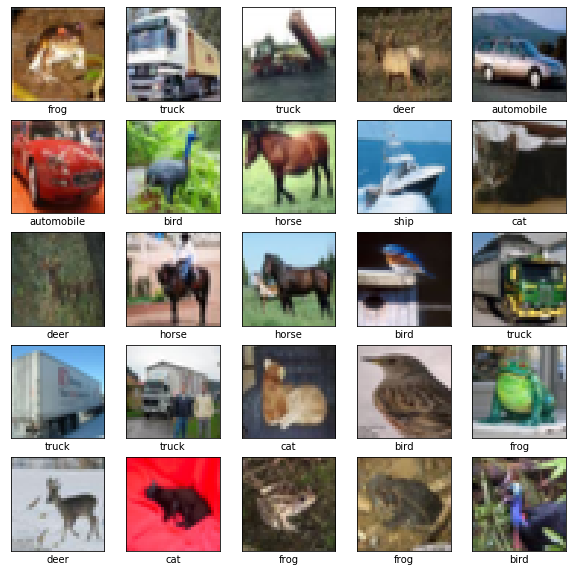

In [28]:
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Createa convolutional base

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)               

In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.5024 - accuracy: 0.4526 - val_loss: 1.2333 - val_accuracy: 0.5636
Epoch 2/5
50000/50000 [==============================] - 72s 1ms/sample - loss: 1.1372 - accuracy: 0.5986 - val_loss: 1.0612 - val_accuracy: 0.6285
Epoch 3/5
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.9886 - accuracy: 0.6531 - val_loss: 1.0510 - val_accuracy: 0.6283
Epoch 4/5
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.8927 - accuracy: 0.6858 - val_loss: 0.9192 - val_accuracy: 0.6788
Epoch 5/5
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.8266 - accuracy: 0.7100 - val_loss: 0.9247 - val_accuracy: 0.6744


10000/10000 - 4s - loss: 0.9247 - accuracy: 0.6744
0.6744


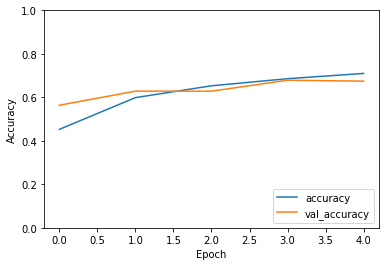

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

RESNET50 without pretrained

In [0]:
modelresnet50v2 = tf.keras.applications.ResNet50V2(include_top=True, weights=None,
            input_shape=(32, 32, 3), classes=10)

In [0]:
modelresnet50v2.summary()


In [0]:
opt = tf.keras.optimizers.SGD(0.002)

modelresnet50v2.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = modelresnet50v2.fit(train_images, train_labels, epochs=5, 
          validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
 3904/50000 [=>............................] - ETA: 53:44 - loss: 2.4377 - accuracy: 0.1335

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = modelresnet50v2.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

RESNET50 with pretrained weight from imagenet

In [0]:
modelresnet50v2pre = tf.keras.Sequential()

modelresnet50v2pre.add(tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet',
            pooling='avg', input_shape=(32, 32, 3)))

In [0]:
modelresnet50v2pre.summary()

In [0]:
modelresnet50v2pre.add(layers.Dense(10, activation="softmax"))

In [0]:
modelresnet50v2pre.summary()

In [0]:
opt = tf.keras.optimizers.SGD(0.002)

modelresnet50v2pre.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = modelresnet50v2pre.fit(train_images, train_labels, epochs=5, 
          validation_data=(test_images, test_labels))

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = modelresnet50v2pre.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

RESNET101

In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.applications.ResNet101V2(include_top=False, weights='imagenet',
            pooling='avg', input_shape=(32, 32, 3)))
model.add(layers.Dense(10, activation="softmax"))

opt = tf.keras.optimizers.SGD(0.002)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5, 
          validation_data=(test_images, test_labels))

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

VGG19¶

In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.applications.VGG19(include_top=False, weights='imagenet',
            pooling='avg', input_shape=(32, 32, 3)))
model.add(layers.Dense(10, activation="softmax"))

opt = tf.keras.optimizers.SGD(0.002)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5, 
          validation_data=(test_images, test_labels))

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

MOBILENETV2

In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet',
            pooling='avg', input_shape=(32, 32, 3)))
model.add(layers.Dense(10, activation="softmax"))

opt = tf.keras.optimizers.SGD(0.002)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5, 
          validation_data=(test_images, test_labels))

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

A better model :-)  **DUBTÓS SI POSAR-LO**

In [0]:
print(train_images.shape)
print(test_images.shape)

In [0]:
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

model.add(tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', input_shape=(32, 32, 3)))

model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.RMSprop(lr=2e-5)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=8, 
          validation_data=(test_images, test_labels))

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)